<a href="https://colab.research.google.com/github/AloneMusk/DeepLearning_with_PyTorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

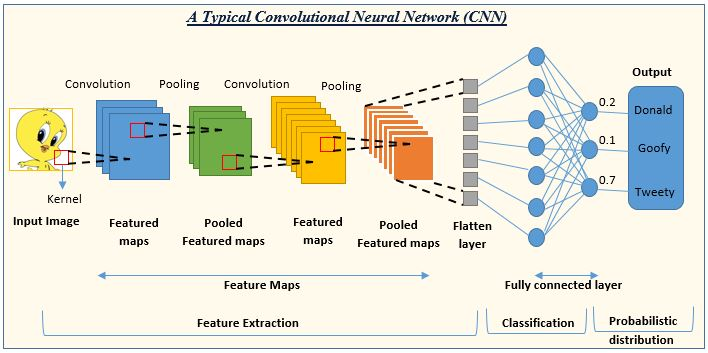

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# Convert MNIST image files into tensor of 4 dimensions (no. of images, height, width, colour channel)
transform = transforms.ToTensor()

In [88]:
#Save the dataset into a local folder on colab called CNN_data
#We want it as a training dataset so train is True
#We want to download it to our local colab, so download is True
#We want to transform it into a tensor so we set that variable as well
train_data = datasets.MNIST(root='/CNN_data', train=True, download=True, transform=transform)

In [89]:
test_data = datasets.MNIST(root='/CNN_data', train=False, download=True, transform=transform)

In [90]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: /CNN_data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: /CNN_data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [91]:
#Create a small batch size for our images
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=False)

In [92]:
#Define our CNN model
#Describe convolutional layer and describe what its doing (2 convolutional layers)
#This is just an example for now

#(input channel, output channel(basically how many features we want), kernel size(here we opt for 3x3), stride(basically how many strides we want to take while convolving))
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [93]:
#Grab 1 MNIST record/image

for i, (X_train, y_train) in enumerate(train_data):
  break


In [94]:
X_train.shape
# torch.Size([no. of images, height, width])

torch.Size([1, 28, 28])

In [95]:
y_train

5

In [96]:
x = X_train.view(1,1,28,28)
# 1 batch, 1 image, height, width
x.shape

torch.Size([1, 1, 28, 28])

In [97]:
#Perform 1st convolution
x = F.relu(conv1(x)) #Rectified Linear unit for our activation function
x.shape
#o/p: 1 is the one single image, 6 is the number of filters we asked for, 26x26 because we didn't set padding while defining the convolutional layers and hence some of the outer layers were deleted
# which in turn lead to the reduction in pixel size of the image. It is advisable to use padding in real life scenarios

torch.Size([1, 6, 26, 26])

In [98]:
#Pass through the pooling layer
x = F.max_pool2d(x, 2, 2) #(what we want to pool, kernel size, stride)
x.shape #26 / 2 = 13, i.e, pixel size is reducing by half

torch.Size([1, 6, 13, 13])

In [99]:
#run 2nd convolutional layer
x = F.relu(conv2(x))
x.shape #Yet again, because we haven't mentioned padding, a lil bit of the edges are removed and image becomes 11x11

torch.Size([1, 16, 11, 11])

In [100]:
x = F.max_pool2d(x,2,2)
x.shape #pixel values are halved again and ceiled

torch.Size([1, 16, 5, 5])

In [101]:
x.view(-1, 5*5*16)
x

tensor([[[[1.0623e-01, 1.2186e-01, 1.3925e-01, 1.3226e-01, 1.0919e-01],
          [8.9910e-02, 4.7427e-02, 5.7500e-02, 1.0668e-01, 1.7547e-01],
          [8.4648e-02, 8.2240e-02, 1.3124e-01, 1.7618e-01, 1.1226e-01],
          [8.6184e-02, 1.2790e-01, 1.4249e-01, 7.9841e-02, 1.4134e-01],
          [1.2576e-01, 1.4149e-01, 7.3839e-02, 1.0088e-01, 1.4073e-01]],

         [[1.1695e-01, 8.3361e-02, 1.0073e-01, 1.1936e-01, 1.3966e-01],
          [1.3348e-01, 7.5436e-02, 1.1198e-01, 1.3440e-01, 1.7571e-01],
          [1.1341e-01, 1.1634e-01, 1.2794e-01, 1.7980e-01, 1.2942e-01],
          [1.1403e-01, 1.1328e-01, 7.2154e-02, 2.4513e-02, 1.1386e-01],
          [1.0355e-01, 5.4126e-02, 5.8472e-02, 1.2314e-01, 1.0406e-01]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4218e-02, 2.1607e-02],
          [0.0000e+00, 0.0000e+00, 2.3462e-03, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.1309e-02, 6.8613e-03],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

##CNN model

In [102]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #Fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120) #5*5*16 = number of inputs based on the o/p we saw at the end of the 2nd pooling. 120 is just the way in which we are flattening out the whole data
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) #10 is the output becasue MNIST has 10 numbers

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) #2x2 kernel and stride=2
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) #2x2 kernel and stride=2

    #Re-View to flatten it out
    X = X.view(-1, 16*5*5) #-ve one so that we can vary the batch size

    #Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    self.fc3(X)

    return F.log_softmax(X, dim=1)


In [103]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [104]:
#Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [105]:
import time
start_time = time.time()

#Create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#loop for 'n' epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0

  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1] #add up the no. of correct predictions
    batch_correct = (predicted==y_train).sum()
    trn_corr += batch_correct

    #Update our paramters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print some results
    if b%600==0:
      print(f'Epoch: {i}, Batch: {b}, Loss: {loss.item()}')

    train_losses.append(loss)
    train_correct.append(trn_corr)

  #Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted==y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)



curr_time = time.time()
tot_time = curr_time-start_time
print(f'training took {tot_time/60} minutes')

Epoch: 0, Batch: 0, Loss: 4.43231201171875
Epoch: 0, Batch: 600, Loss: 1.1908702850341797
Epoch: 0, Batch: 1200, Loss: 1.3698763847351074
Epoch: 0, Batch: 1800, Loss: 0.5279739499092102
Epoch: 0, Batch: 2400, Loss: 0.060802437365055084
Epoch: 0, Batch: 3000, Loss: 0.9117821455001831
Epoch: 0, Batch: 3600, Loss: 0.456753671169281
Epoch: 0, Batch: 4200, Loss: 0.02173578180372715
Epoch: 0, Batch: 4800, Loss: 0.03192419186234474
Epoch: 0, Batch: 5400, Loss: 1.3379724025726318
Epoch: 1, Batch: 0, Loss: 0.46394357085227966
Epoch: 1, Batch: 600, Loss: 1.3363678455352783
Epoch: 1, Batch: 1200, Loss: 0.9400909543037415
Epoch: 1, Batch: 1800, Loss: 0.9523367881774902
Epoch: 1, Batch: 2400, Loss: 0.8224393129348755
Epoch: 1, Batch: 3000, Loss: 0.8869897723197937
Epoch: 1, Batch: 3600, Loss: 0.445528119802475
Epoch: 1, Batch: 4200, Loss: 0.44975247979164124
Epoch: 1, Batch: 4800, Loss: 0.49810323119163513
Epoch: 1, Batch: 5400, Loss: 1.3517733812332153
Epoch: 2, Batch: 0, Loss: 1.3671576976776123
